In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:

df=pd.read_csv("/content/Titanic_train.csv")

In [9]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


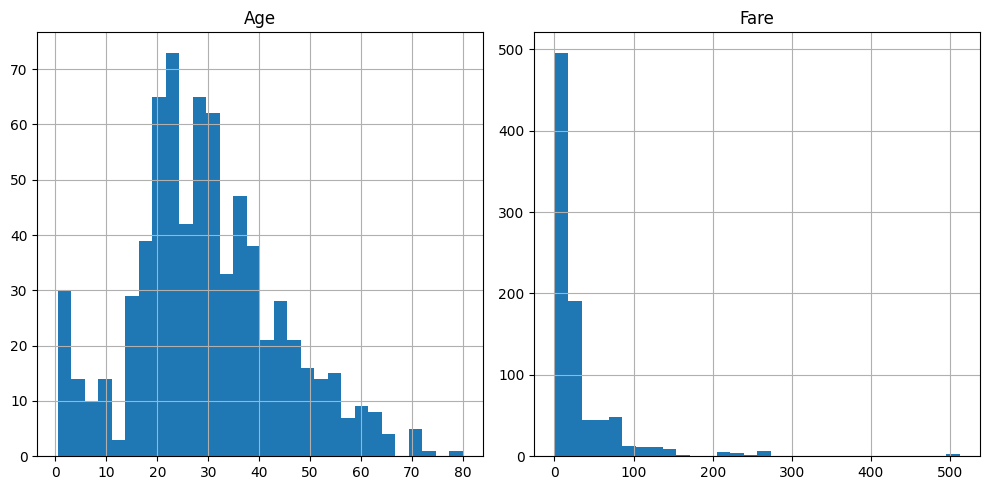

In [13]:
df[['Age', 'Fare']].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()

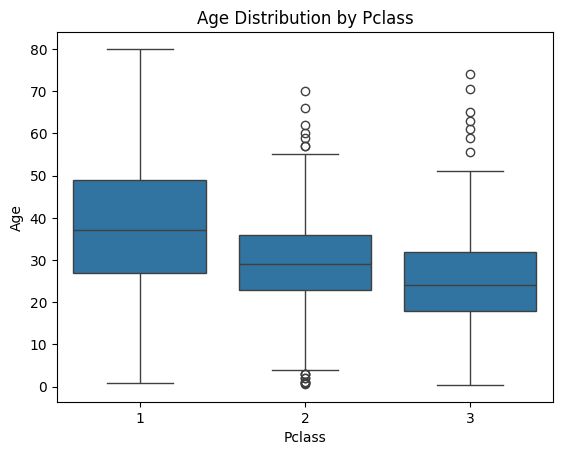

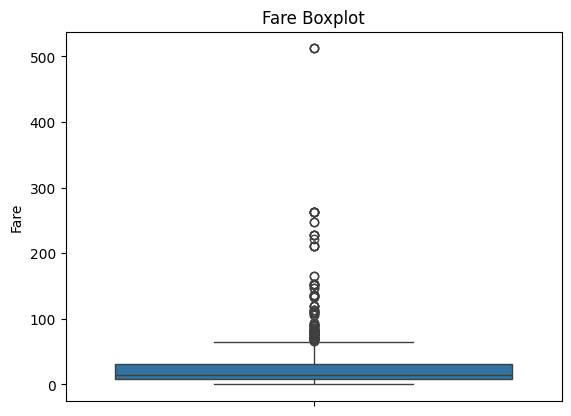

In [14]:
import seaborn as sns
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

# Boxplot for Fare
sns.boxplot(y='Fare', data=df)
plt.title('Fare Boxplot')
plt.show()

<Axes: xlabel='Survived'>

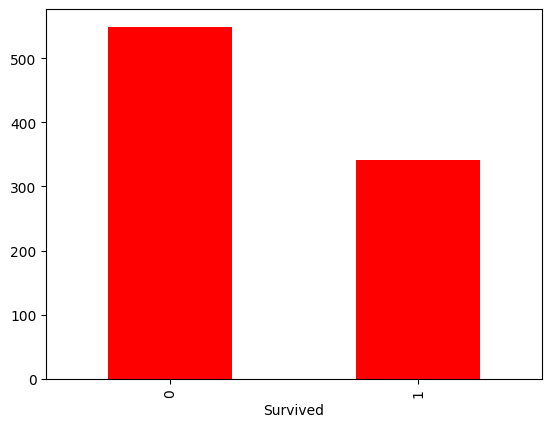

In [15]:
df['Survived'].value_counts().plot(kind="bar",facecolor="red")


HANDLING MISSING VALUES

In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


THE AGE COLUMN CONTAINS NUMERIC VALUES SOO THE NULL VALUES REPALCE WITH MEAN OF THAT COLUMN

In [17]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

THE EMBARKED COLUMN CONTAINS CATEGORICAL DATA SO THE NULL VALUES REPLACE WITH MODE OF THAT COLUMN

In [18]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

THE CABIN COLUMN OF THE DATA HAS MOST NULL VALUES THAT'S WHY THE CABIN COLUMN IS NOT MUCH IMPORTANT SOO I DROP THE CABIN COLUMN FROM DATA

In [19]:
df=df.dropna(subset=["Cabin"])

In [20]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          204 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     204 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.7+ KB


ENCODING CATEGORICAL COLUMNS

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

print(df[['Sex', 'Sex_encoded']].head())

       Sex  Sex_encoded
1   female            0
3   female            0
6     male            1
10  female            0
11  female            0


/tmp/ipython-input-22-891924893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex_encoded'] = le.fit_transform(df['Sex'])


In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0


In [30]:
df['Embarked_encoded'] = le.fit_transform(df['Sex'])

df

/tmp/ipython-input-30-3779129558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked_encoded'] = le.fit_transform(df['Sex'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0


In [31]:
features = ['Pclass', 'Sex_encoded', 'Age', 'Fare', 'Embarked_encoded']
X = df[features]
y = df['Survived']


In [32]:
X

,Pclass,Sex_encoded,Age,Fare,Embarked_encoded
1,1,0,38.0,71.2833,0
3,1,0,35.0,53.1000,0
6,1,1,54.0,51.8625,1
10,3,0,4.0,16.7000,0
11,1,0,58.0,26.5500,0
...,...,...,...,...,...
871,1,0,47.0,52.5542,0
872,1,1,33.0,5.0000,1
879,1,0,56.0,83.1583,0
887,1,0,19.0,30.0000,0


In [33]:
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [36]:
y_prob = model.predict_proba(X_test)[:, 1]

In [37]:
y_prob

array([0.28842831, 0.87600545, 0.45943994, 0.39491352, 0.92501644,
       0.91490479, 0.46092106, 0.50629852, 0.85187723, 0.94783629,
       0.92616808, 0.32644418, 0.93142966, 0.53176052, 0.82326932,
       0.82768699, 0.2312063 , 0.57932103, 0.45241608, 0.3198734 ,
       0.86944855, 0.69306926, 0.95330506, 0.9401951 , 0.90501702,
       0.94320517, 0.4170218 , 0.54428702, 0.86604563, 0.36700763,
       0.94893095, 0.95066372, 0.86117814, 0.93717765, 0.5158138 ,
       0.3722088 , 0.28809485, 0.93987014, 0.93682517, 0.83573743,
       0.50720859])

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8292682926829268
Confusion Matrix:
 [[ 8  3]
 [ 4 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.90      0.87      0.88        30

    accuracy                           0.83        41
   macro avg       0.78      0.80      0.79        41
weighted avg       0.83      0.83      0.83        41



In [39]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)

In [40]:
# Basic metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8293
Precision: 0.8966
Recall: 0.8667
F1-score: 0.8814
ROC-AUC: 0.9303

Confusion Matrix:
[[ 8  3]
 [ 4 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.90      0.87      0.88        30

    accuracy                           0.83        41
   macro avg       0.78      0.80      0.79        41
weighted avg       0.83      0.83      0.83        41



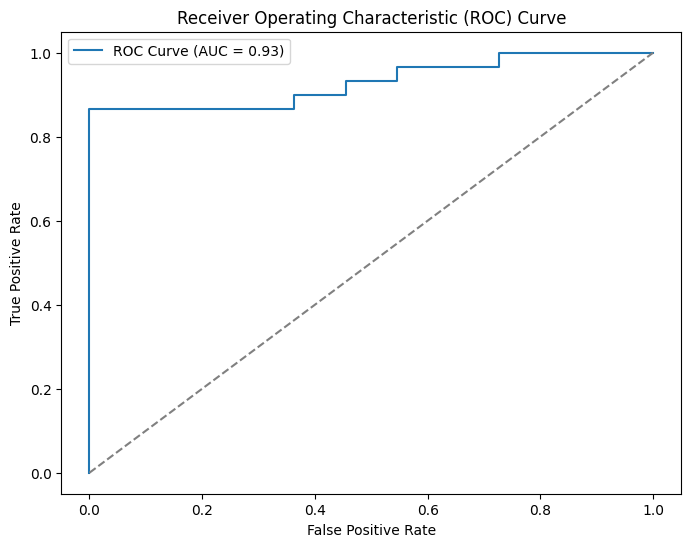

In [41]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [42]:

features = X.columns

coefs = model.coef_[0]


intercept = model.intercept_[0]

for feat, coef in zip(features, coefs):
    print(f"{feat}: {coef:.4f}")

print(f"Intercept: {intercept:.4f}")


Pclass: -0.5300
Sex_encoded: -1.2416
Age: -0.0298
Fare: 0.0004
Embarked_encoded: -1.2416
Intercept: 3.9116


In [43]:

for feat, coef in zip(features, coefs):
    odds_ratio = np.exp(coef)
    print(f"{feat}: Coefficient = {coef:.4f}, Odds Ratio = {odds_ratio:.4f}")


Pclass: Coefficient = -0.5300, Odds Ratio = 0.5886
Sex_encoded: Coefficient = -1.2416, Odds Ratio = 0.2889
Age: Coefficient = -0.0298, Odds Ratio = 0.9707
Fare: Coefficient = 0.0004, Odds Ratio = 1.0004
Embarked_encoded: Coefficient = -1.2416, Odds Ratio = 0.2889


High-magnitude coefficients (absolute) have a stronger impact.

Features like Sex, Pclass, and Fare often show clear trends in Titanic:

Sex: Strongest — females much more likely to survive.

Pclass: Higher class- more likely to survive.

Age: Younger passengers had slightly better survival odds.

Embarked: Shows slight differences by port.

In [44]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')

# Also save your LabelEncoder if you used it
joblib.dump(le, 'label_encoder.pkl')

print("✅ Model and encoder saved as .pkl files!")


✅ Model and encoder saved as .pkl files!


In [45]:
import os
print(os.listdir())

['.config', 'model.pkl', 'label_encoder.pkl', 'Titanic_train.csv', 'sample_data']


In [46]:
!ls


label_encoder.pkl  model.pkl  sample_data  Titanic_train.csv


In [49]:
from google.colab import files

# Download model
files.download('model.pkl')

# Download encoder
files.download('label_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
%%writefile requirements.txt
streamlit
pandas
numpy
scikit-learn


Writing requirements.txt
